In [1]:
import pandas as pd
import numpy as np
from utils import *


N_DONE = 23

def getVirtual(group):
    df =pd.read_csv("ordered/{}.csv".format(group))
    performance = 0.0
    for i in range(3, len(df.keys())):
        key = df.keys()[i]
        #print(key)
        mindex = df[key].idxmin()
        #print(df["Config"][df[key].idxmin()])
        time = df[key][mindex]
        #print(time)
        performance += time
    return performance

def getBest(group):
    df =pd.read_csv("ordered/{}.csv".format(group))
    mindex = df["Score"].idxmin()
    return mindex

def bestPerInstance(group):
    df =pd.read_csv("ordered/{}.csv".format(group))
    instances = []
    best = []
    bestavg = []
    for i in range(3, len(df.keys())):
        key = df.keys()[i]
        print(i-2)
        instances.append(i - 2)
        mindex = df[key].idxmin()

        print(df["Config"][df[key].idxmin()])
        time = df[key][mindex]
        best.append(time)
        
        bestavg.append(df[key][getBest(group)])
    return (instances,best,bestavg)
    


In [2]:

import matplotlib.pyplot as plt
import numpy as np

def plot_grouped_bar_graph(labels, default_values, optimal_values, title="Performance Comparison", xlabel="Instances", ylabel="Values"):
    """
    This function creates and displays a grouped bar graph for comparing default and optimal values for each instance.

    Parameters:
    - labels: A list of labels for the instances (e.g., ['A', 'B', 'C']).
    - default_values: A list of default values corresponding to each instance.
    - optimal_values: A list of optimal values corresponding to each instance.
    - title: The title of the graph (default is "Performance Comparison").
    - xlabel: Label for the x-axis (default is "Instances").
    - ylabel: Label for the y-axis (default is "Values").
    """
    
    # Number of instances
    n = len(labels)
    
    # Define the width of each bar
    bar_width = 0.35
    
    # Define positions for the bars on the x-axis
    index = np.arange(n)
    
    # Create the grouped bar plot
    plt.bar(index, default_values, bar_width, label='Default', color='darkred')
    plt.bar(index + bar_width, optimal_values, bar_width, label='Virtual Solver', color='cyan')

    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add x-ticks and labels
    plt.xticks(index + bar_width / 2, labels)
    
    # Add legend
    plt.legend()

    # Display the plot
    plt.show()


1
preprocess=0
2
probe=0
3
reorder=0
4
factor=0
5
eliminate=0
6
backbone=0
7
backbone=0
8
backbone=0
9
backbone=0
10
backbone=0
11
backbone=0
12
probe=0


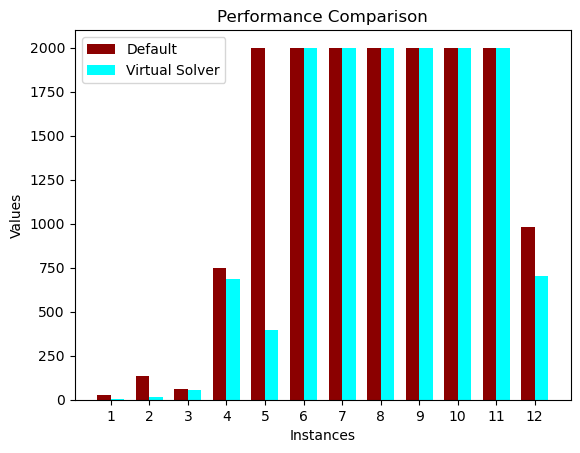

In [3]:
res = bestPerInstance(19)

plot_grouped_bar_graph(res[0], res[2], res[1])

In [8]:
for i in range(N_DONE + 1):
    df = pd.read_csv("ordered/{}.csv".format(i))
    best = getS(i)
    virtual = getVirtual(i)
    print("{}:Best Solver {}, Virtual Solver {}, Performance Increase {}".format(i, best, virtual, virtual/best))

0:Best Solver 11249.834104061127, Virtual Solver 8038.004904985428, Performance Increase 0.7144998611209523
1:Best Solver 9456.330492019653, Virtual Solver 9332.761637687683, Performance Increase 0.9869326844661096
2:Best Solver 19310.281015634537, Virtual Solver 17200.090639591217, Performance Increase 0.8907219229831608
3:Best Solver 15026.68045759201, Virtual Solver 14806.706894636154, Performance Increase 0.9853611339126654
4:Best Solver 3163.363026380539, Virtual Solver 1744.0656349658966, Performance Increase 0.5513327494888957
5:Best Solver 17493.725746393204, Virtual Solver 16633.810515403748, Performance Increase 0.9508443630901925
6:Best Solver 25652.15563106537, Virtual Solver 25473.048918008804, Performance Increase 0.993017868921719
7:Best Solver 13394.707326173782, Virtual Solver 7621.0693917274475, Performance Increase 0.5689612476142408
8:Best Solver 28231.10926938057, Virtual Solver 26444.97518348694, Performance Increase 0.9367317072506651
9:Best Solver 18751.73839974

In [5]:
for i in range(N_DONE + 1):
    (approx,distr,assign) = best2(i)
    df = pd.read_csv("ordered/{}.csv".format(i))
    best = df["Score"][getBest(i)]
    virtual = getVirtual(i)
    print("{}:Best Solver {}, Virtual Solver {}, Performance Increase {}".format(i, best, virtual, virtual/best))
    print("{}:Best Solver {}, Approximation: {}, Performance Boost: {}, Loss Virtual: {}".format(i, best, approx, approx/best, approx/virtual))
    print("{}:{}".format(i,distr))
    print("{}:{}".format(i,assign))

0:Best Solver 11249.834104061129, Virtual Solver 8038.004904985428, Performance Increase 0.7144998611209522
0:Best Solver 11249.834104061129, Approximation: 8779.230255126953, Performance Boost: 0.7803875305110232, Loss Virtual: 1.0922150905483765
0:(6, 10)
0:('restart=0', 'sweep=0')
1:Best Solver 9456.330492019652, Virtual Solver 9332.761637687683, Performance Increase 0.9869326844661097
1:Best Solver 9456.330492019652, Approximation: 9374.510772705078, Performance Boost: 0.9913476248124341, Loss Virtual: 1.0044733956183776
1:(7, 9)
1:('factor=0', 'target=0')
2:Best Solver 19310.281015634537, Virtual Solver 17200.090639591217, Performance Increase 0.8907219229831608
2:Best Solver 19310.281015634537, Approximation: 17700.81314444542, Performance Boost: 0.9166522812440682, Loss Virtual: 1.029111620127259
2:(5, 11)
2:('chrono=0', 'target=2')
3:Best Solver 15026.68045759201, Virtual Solver 14806.706894636154, Performance Increase 0.9853611339126654
3:Best Solver 15026.68045759201, Approxi

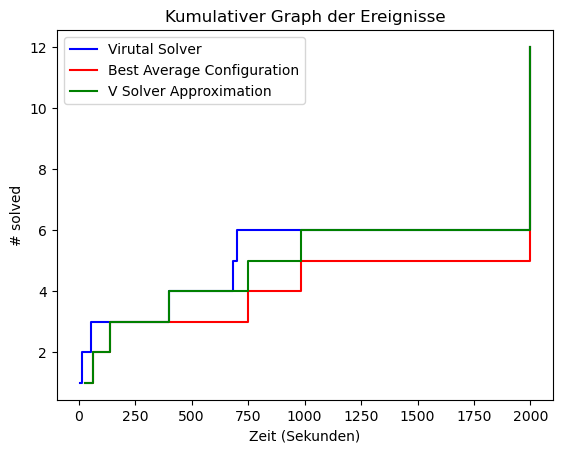

In [6]:
from utils import *
plotcummulativeV(19)

In [7]:
df = pd.read_csv("ordered/{}.csv".format(19))
print(df["Score"][getBest(19)])

print(getS(19))

19960.436218500137
15960.436218500137
